In [38]:
# %pip install dabl
# %pip install pandas
#%pip install ydata-profiling
#%pip install great_expectations
%pip install faker matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 962.6 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process, as it facilitates a deeper understanding of the dataset's underlying structure and characteristics. One of the primary aspects of EDA is the examination of data distribution, which provides insights into the spread, central tendency, and shape of the data. These characteristics are essential for determining the appropriate statistical models and transformations. For instance, skewed data may require normalization or scaling to meet the assumptions of certain algorithms, while normally distributed data may allow for direct application of parametric models.

Another key function of EDA is handling missing data. Detecting missing values early is vital, as unaddressed gaps in data can lead to biased analyses and incorrect conclusions. EDA helps the analyst decide whether to remove incomplete data points, impute missing values using statistical methods, or opt for models that can inherently manage missing data. The choice of approach depends on the extent of missing data and its potential impact on the results.

EDA also plays a significant role in assessing feature relationships. By visualizing correlations and pairwise relationships, analysts can determine which features are most informative and which may be redundant due to high multicollinearity. Understanding these relationships not only helps in feature selection but also informs the interpretation of the data and the development of more robust predictive models.

In addition, EDA aids in the identification of outliers and anomalies within the data. Outliers can significantly skew results and model performance, making it essential to detect and handle them appropriately. EDA allows for the early identification of these extreme values, enabling analysts to decide whether to remove them, transform the data, or adjust the analysis to account for their presence.

Finally, EDA provides initial insights for generating hypotheses about the data. By uncovering patterns and relationships, EDA helps guide subsequent analysis steps, such as selecting features for modeling or testing specific hypotheses. This process not only leads to a more focused approach in data analysis but also enhances the interpretability and validity of the final models.

In summary, EDA is an indispensable phase in data analysis that informs decision-making regarding data preparation, model selection, and the formulation of hypotheses, ultimately leading to more accurate and meaningful results.

In [19]:

import pandas as pd
import dabl 
train_data = pd.read_csv('//Users/adriana-stefaniaciupeanu/Documents/Personal projects/Titanic/train.csv')

## Data Analysis Baseline Library (dabl)

Tools like dabl are designed to streamline the exploratory data analysis (EDA) process, making it more accessible and efficient, particularly for users who may be new to data science or are working with complex datasets. dabl is a Python library that automates many of the essential tasks in EDA, such as visualizing distributions, detecting missing values, and identifying relationships between features, thereby reducing the manual effort and time typically required for these steps.

One of the key advantages of using tools like dabl is their ability to quickly generate comprehensive reports and visualizations that summarize important aspects of the dataset. For example, dabl can automatically detect data types (e.g., categorical, numerical), which helps guide the selection of appropriate visualization methods. It can also generate pairwise plots and correlation matrices that highlight potential relationships between features. This allows users to gain insights from the data with minimal coding, focusing their time on interpreting the results rather than manually configuring plots and analysis steps.

In addition to speeding up the analysis, dabl supports robust data cleaning and preprocessing workflows. It can identify missing data and provide recommendations for handling it, such as imputation or removal of rows with missing values. Moreover, dabl offers functionality to detect outliers and suggest appropriate transformations (e.g., scaling or normalizing) that could improve the performance of machine learning models.

The automation provided by tools like dabl does not sacrifice flexibility. While the tool makes initial EDA more efficient, users can still customize analyses, tailoring them to the specific nuances of their datasets. This combination of automation and customization ensures that even with minimal input, the user can achieve high-quality insights while retaining control over more complex analysis steps.

By incorporating tools like dabl into the EDA process, analysts can focus on interpreting data and making informed decisions, rather than getting bogged down in the mechanics of exploratory analysis. This makes it particularly useful for beginners or those working on time-sensitive projects, while still offering the depth and flexibility needed for more advanced users.

The dabl.detect_types() function is a useful feature of the dabl library that automatically analyzes the columns of a DataFrame to determine the types of data they contain. This function helps classify columns into categories like continuous, categorical, or date-time, which can significantly streamline the data cleaning and preprocessing stages.

When you apply dabl.detect_types() to your train_data DataFrame, the function will return a summary that indicates the type of data in each column. This information is crucial in helping you decide the appropriate methods for visualization, transformation, or handling missing values. For example, numerical columns identified as continuous might require scaling, while categorical columns could be one-hot encoded for use in machine learning models.

In [20]:
# Detect the types of data in the train_data DataFrame
dabl.detect_types(train_data)

/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individual

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
PassengerId,False,False,False,False,False,False,False,True
Survived,False,False,False,False,True,False,False,False
Pclass,False,False,False,False,True,False,False,False
Name,False,False,False,False,False,False,True,False
Sex,False,False,False,False,True,False,False,False
Age,True,False,False,False,False,False,False,False
SibSp,False,False,True,False,False,False,False,False
Parch,False,False,True,False,False,False,False,False
Ticket,False,False,False,False,False,False,True,False
Fare,True,False,False,False,False,False,False,False


The output from dabl.detect_types() provides a clear classification of each column in the train_data DataFrame, indicating the nature of the data and helping to inform the next steps in the exploratory data analysis (EDA) process. Here’s how to interpret and use this information:

* Continuous: Columns such as Age and Fare are classified as continuous, meaning they contain numerical data that can take any value within a range. These columns may require scaling or normalization if you are using machine learning algorithms that are sensitive to the range of data.

* Low Cardinality Integers: The columns SibSp and Parch are marked as low_card_int_ordinal, meaning they are integer-based features with a small number of distinct values. These columns could be treated as ordinal features in models or transformed depending on the context.

* Categorical: Columns like Survived, Pclass, Sex, and Embarked are identified as categorical. These features represent distinct categories and will need to be encoded (e.g., one-hot encoding or label encoding) before being used in machine learning models.
*Free String: Columns like Name, Ticket, and Cabin are classified as free_string, meaning they contain unstructured textual data. You may choose to extract relevant information from these columns (e.g., titles from Name or deck information from Cabin) or drop them if they don’t add predictive value.

* Useless: The PassengerId column is flagged as useless because it likely does not provide meaningful information for modeling—it’s just an identifier. We can safely drop this column from your analysis.

## Visualisation

Visualization is one of the most critical components of Exploratory Data Analysis (EDA). he dabl.plot() function is designed to automate the process of creating insightful visualizations during EDA. It explores the dataset, creates appropriate plots based on the data types, and highlights key relationships, such as how features interact with the target variable. In your case, you're analyzing the train_data with a target column of "Survived" to understand which features might influence survival.

This function call will generate several plots, including:

Univariate Analysis: Visualizations of individual features to understand their distribution and how they relate to survival (e.g., histograms or box plots for continuous variables like Age and Fare).

Bivariate Analysis: For categorical features such as Sex or Pclass, it might generate bar plots showing survival rates across different categories, helping identify patterns in the data.

Pairwise Relationships: It can also show scatter plots or correlation matrices to explore relationships between multiple features and how they jointly affect the target.
This automatic plotting by dabl.plot() allows you to quickly gain insights without manually coding individual plots, while still retaining the flexibility to customize and build on these visualizations later.

/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/opt/homebrew/lib/python3.11/site-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individual

Target looks like classification


/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:
/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:621: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(target)[column].value_counts().unstack(target)
/opt/homebrew/lib/python3.11/site-packages/dabl/plot/utils.py:621: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

Linear Discriminant Analysis training set score: 0.589


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Survived'>,
 [array([[<Axes: ylabel='Age'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='SibSp'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='Parch'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: xlabel='Age', ylabel='Fare'>, <Axes: xlabel='SibSp'>,
          <Axes: xlabel='Parch'>, <Axes: xlabel='Fare'>]], dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<Axes: title={'center': 'Sex'}>,
         <Axes: title={'center': 'Pclass'}>,
         <Axes: title={'center': 'Embarked'}>]], dtype=object)]

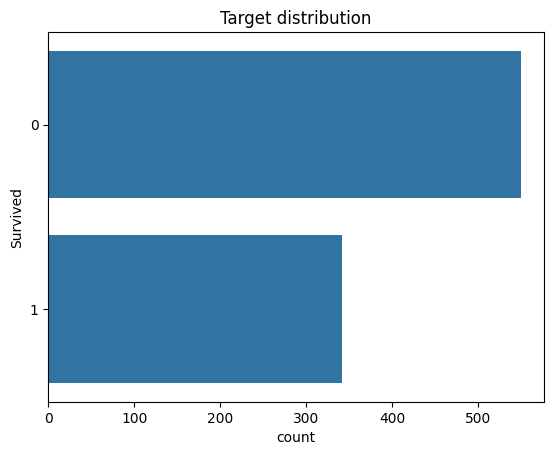

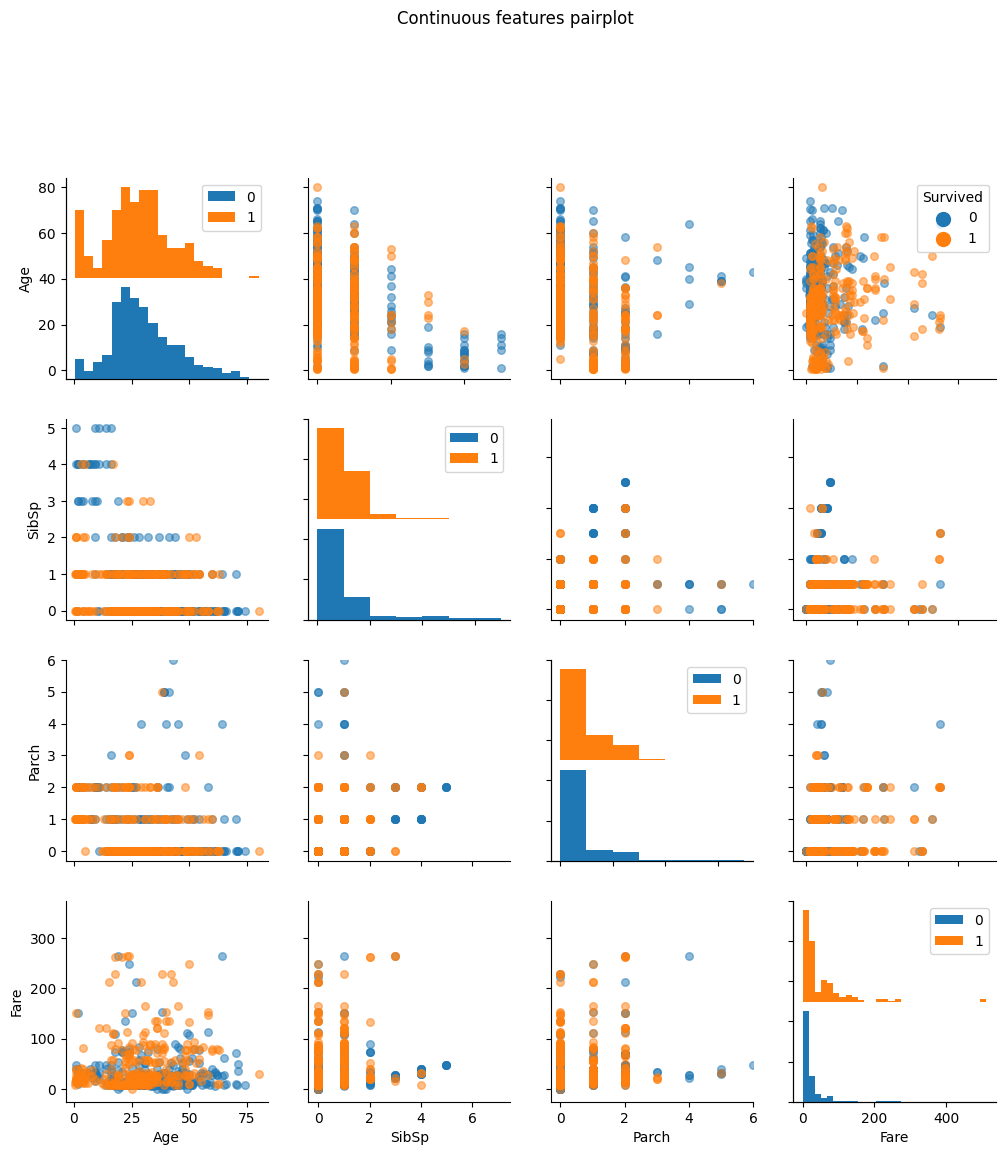

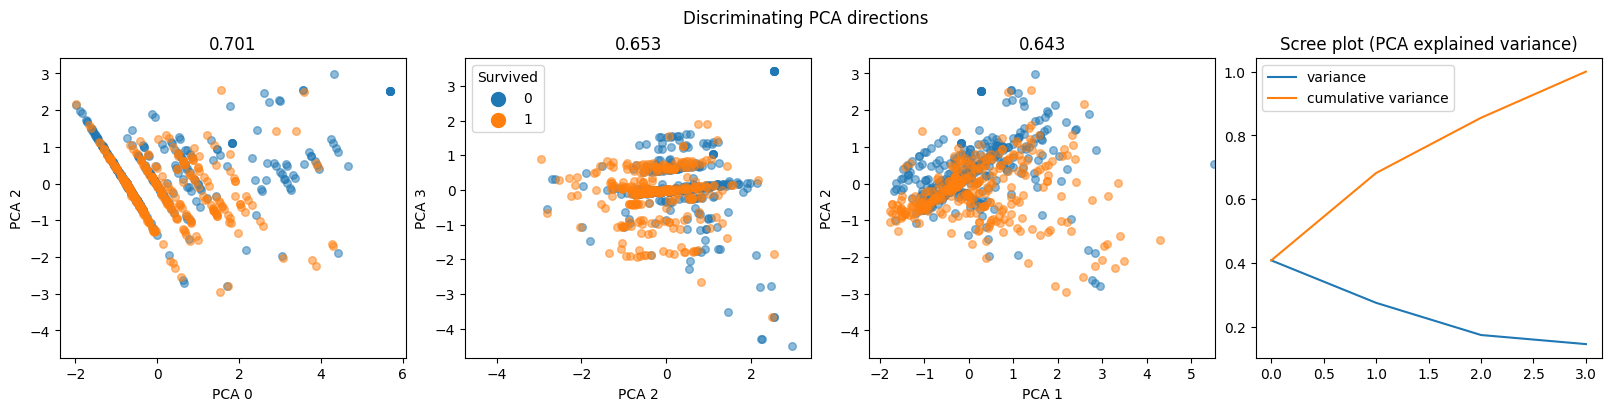

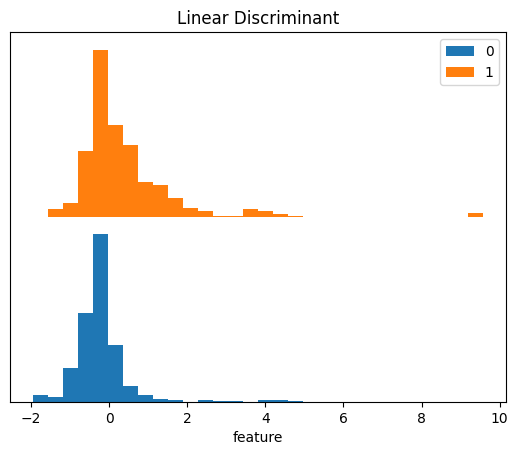

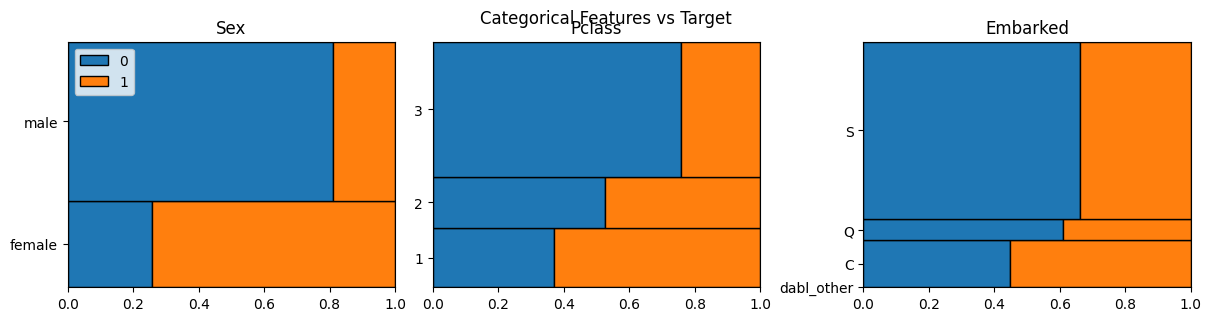

In [21]:
# Create exploratory visualizations for the dataset with "Survived" as the target column
dabl.plot(train_data, target_col="Survived")

Target Distribution:
The first plot visualizes the distribution of the target variable, Survived, and provides crucial information about whether the dataset is balanced. In this case, the survival data is relatively balanced, with approximately 60% non-survivors and 40% survivors. This balance suggests that common metrics like accuracy_score are appropriate for evaluating model performance. However, in cases of imbalanced datasets, where one class significantly outweighs the other, more advanced techniques such as oversampling, undersampling, or using evaluation metrics like F1-score or AUC would be necessary to avoid misleading results.

Continuous Features Plot:
The next visualization is a matrix of plots for the continuous features (Age, SibSp, Parch, and Fare). The diagonal shows univariate distribution plots for each feature, while the off-diagonal displays scatter plots for feature pairs. Notably, the Age distribution shows that a larger proportion of younger passengers survived compared to older ones, making this an important variable for modeling survival. Similarly, the SibSp plot suggests that passengers traveling with a sibling or spouse had a higher chance of survival. On the other hand, Parch and Fare show little distinction between survival outcomes. The scatter plots also help to identify potential outliers, such as one family paying a much higher fare, which might warrant further investigation.

Principal Component Analysis (PCA):
This section features scatter plots comparing the PCA directions, along with a scree plot that shows the explained variance by each principal component. The first component accounts for about 40% of the variance, which could suggest the possibility of dimensionality reduction. However, with the limited number of features in this dataset, PCA may not be highly beneficial. Instead, feature selection based on their importance in predicting survival is a more practical approach. While PCA can be valuable in more complex datasets, applying it here may not significantly improve model performance.

Linear Discriminant Analysis (LDA):
LDA aims to find a linear combination of features that best separates the classes (Survived = 0 and Survived = 1). The histogram shows the regression coefficients (weights) along the x-axis, with the goal of assessing how separable the two classes are. In this case, the overlap between the two classes suggests that LDA is not particularly effective in distinguishing between survivors and non-survivors. Therefore, other techniques, such as decision trees or logistic regression, may be more suitable for this dataset.

Categorical Features:
The final set of plots consists of mosaic plots for the categorical features (Sex, Pclass, and Embarked). These plots reveal some of the strongest relationships in the data. For example, a clear majority of females survived compared to males, and survival rates also varied significantly by passenger class, with those in first class having the highest survival rate. These insights suggest that incorporating Sex and Pclass into your model is likely to improve its predictive accuracy, as these variables show strong associations with the target outcome.

## Pearson correlation matrix

The Pearson correlation matrix provides a useful summary of the linear relationships between continuous variables in the dataset. By using the train_data.corr() function, we can produce this matrix and visualize it using a color gradient for easier interpretation.

In [27]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=[float, int])

# Now compute the correlation matrix and apply the background gradient
numeric_data.corr().style.background_gradient(cmap='Blues')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Interpreting the Pearson Correlation Matrix:

The Pearson correlation coefficient measures the strength of the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A correlation close to 0 indicates no linear relationship.

Highly Correlated Features: If two features are highly correlated (whether positively or negatively), they provide similar information, and one can often be dropped to avoid redundancy and multicollinearity issues in certain models. For instance, if two variables have a correlation above 0.8 or below -0.8, we might consider keeping only one of them.

Key Observations:
* Pclass and Fare: These two variables show a strong negative correlation, which makes sense because higher-class tickets (e.g., first-class) were more expensive than lower-class tickets.

* SibSp and Parch: These features are moderately correlated, suggesting that families often traveled together, as SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) tend to increase together, indicating family units.
* Pclass and Age: There’s also a negative correlation between Pclass and Age, implying that younger passengers were more likely to be in lower classes, such as third-class.
Survived and Pclass: The most important correlation for this analysis is between Survived and Pclass (-0.34), indicating that passengers in lower classes had a significantly lower survival rate, which aligns with historical accounts of the Titanic disaster, where those in first class had the best chances of survival.

Using the Correlation Matrix in Practice:
Understanding these correlations can help guide feature selection and transformation. For example, given the negative correlation between Pclass and Fare, you might choose to drop one of these features (if needed) to reduce multicollinearity. However, in this dataset, both Pclass and Fare likely provide important independent insights, so it might be better to retain both in most models.

The matrix also helps identify patterns that can inform hypothesis testing, for example, examining why Pclass is strongly associated with survival or investigating the effects of family size on survival by looking into the relationship between SibSp, Parch, and Survived.

## Data profiling 

When working with data, ensuring quality is essential for building reliable models and deriving accurate insights. In Python, several tools have emerged to help with data validation and quality checks, each offering unique features for handling various data integrity challenges. Let’s explore some of the most effective libraries for testing data quality.

### Pandas Profiling
Pandas Profiling is a widely used tool for generating comprehensive reports that summarize data quality and offer insights into issues such as missing values, inconsistent data types, and outliers. This library provides a one-stop solution for an initial exploratory data analysis, automating the process of detecting common data problems.

What it checks:

* Missing values and patterns
* Data type consistency
* Univariate and multivariate distributions
* Correlations and outliers




In [32]:
import ydata_profiling

profile = train_data.profile_report(title="Pandas Profiling Report")
profile.to_file("data_quality_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 297.09it/s]


# Data anonymization using Faker

Data anonymization is crucial in the age of data sharing and compliance with privacy laws such as GDPR. For this tutorial, we'll explore how to anonymize sensitive information using Python’s Faker library. Specifically, we’ll work with the Titanic dataset and anonymize the Name, Ticket, and Cabin columns while maintaining the integrity of the data structure.

The goal is to preserve the usefulness of the data for analysis without revealing personally identifiable information (PII).

We will use the following libraries:

* pandas: For handling and manipulating the dataset.
* faker: To generate fake, but plausible, data.
* matplotlib (optional): For visualizing any before/after results.

# Classification 



# Regression